### DESAFIO 5

###Fazendo a leitura dos dados

Primeiramente, vamos importar a biblioteca pandas e os dados que serão utilizados

In [87]:
import pandas as pd
url = 'https://raw.githubusercontent.com/matheuscsx/Desafio-5/main/Planilha.csv'
dados = pd.read_csv(url)
dados

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0




---


Substituindo o cabeçalho por palavras em maíscula

In [88]:
dados.columns = dados.columns.str.upper()
dados.to_csv(url, index=False)
dados.columns

Index(['ID', 'PONTOS', 'ESTADO', 'GENERO', 'IDADE', 'BENS', 'SALDO NA CONTA',
       'PRODUTO', 'POSSUI CARTAO', 'ATIVO', 'SALARIO', 'SAIU'],
      dtype='object')



---


Analisando os dados

In [89]:
dados.describe()

,ID,PONTOS,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


### Corrigindo os dados faltantes

In [90]:
dados.isnull().sum()

,0
ID,0
PONTOS,0
ESTADO,0
GENERO,8
IDADE,0
BENS,0
SALDO NA CONTA,0
PRODUTO,0
POSSUI CARTAO,0
ATIVO,0


Como podemos ver na tabela, há dados faltantes na coluna gênero e salário. Vamos corrigir substituindo-os em gênero pela moda e em salário pela média.

In [91]:
dados['SALARIO'] = dados['SALARIO'].fillna(dados['SALARIO'].mean())
dados['GENERO'] = dados['GENERO'].fillna(dados['GENERO'].mode()[0])
dados.isnull().sum()

,0
ID,0
PONTOS,0
ESTADO,0
GENERO,0
IDADE,0
BENS,0
SALDO NA CONTA,0
PRODUTO,0
POSSUI CARTAO,0
ATIVO,0


###Corrigindo dados categóricos e outliers

In [92]:
dados['GENERO'].unique()

array(['Feminino', 'Masculino', 'M', 'F', 'Fem'], dtype=object)

corrigindo os termos: 'F', 'M' e  'Fem'

In [93]:
dados['GENERO'] = dados['GENERO'].replace({'M': 'Masculino', 'F': 'Feminino', 'Fem': 'Feminino'})
dados['GENERO'].unique()

array(['Feminino', 'Masculino'], dtype=object)

Calculando a média das idades maiores que zero

In [94]:
media_idade = dados[dados['IDADE'] > 0]['IDADE'].mean()

substituindo valores menores ou iguais a zero pela média calculada

In [ ]:
dados['IDADE'] = dados['IDADE'].apply(lambda x: media_idade if x <= 0 else x)

In [95]:
dados.describe()

,ID,PONTOS,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.990000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.287160e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.078473e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.822502e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.416668e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


eliminando linhas duplicadas

In [96]:
dados.drop_duplicates(inplace=True)

###Graficos Seaborn

Importando a biblioteca

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

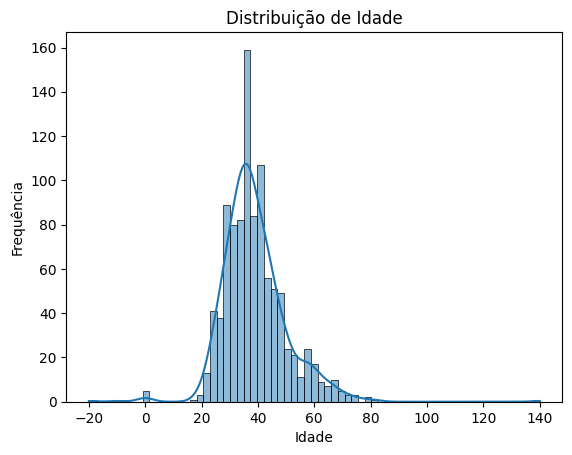

In [98]:
sns.histplot(dados['IDADE'], kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

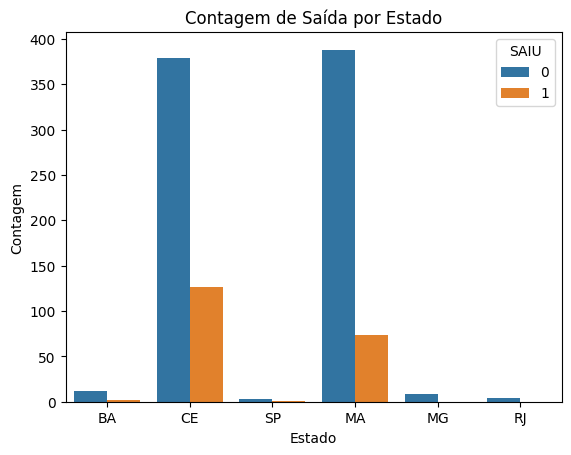

In [99]:
sns.countplot(x='ESTADO', hue='SAIU', data=dados)
plt.title('Contagem de Saída por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.show()

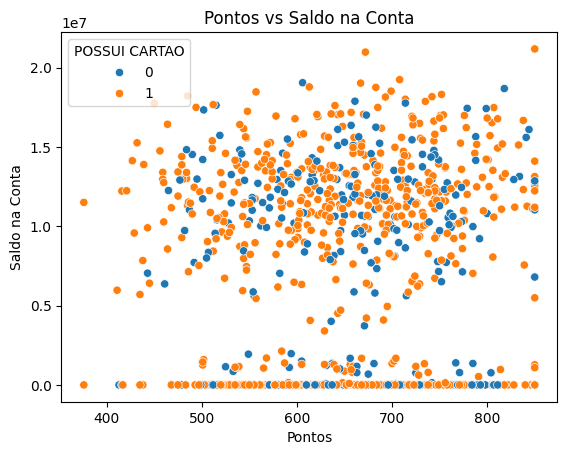

In [100]:
sns.scatterplot(x='PONTOS', y='SALDO NA CONTA', hue='POSSUI CARTAO', data=dados)
plt.title('Pontos vs Saldo na Conta')
plt.xlabel('Pontos')
plt.ylabel('Saldo na Conta')
plt.show()

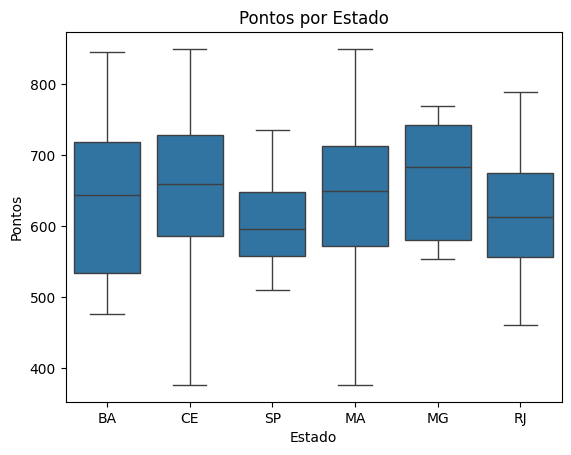

In [101]:
sns.boxplot(x='ESTADO', y='PONTOS', data=dados)
plt.title('Pontos por Estado')
plt.xlabel('Estado')
plt.ylabel('Pontos')
plt.show()